In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("covid19_sp_11_jul_2020.csv")

In [3]:
data.sample(1)

,epidemiological_week,date,order_for_place,state,city,city_ibge_code,place_type,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,new_confirmed,last_available_deaths,new_deaths,last_available_death_rate,estimated_population_2019,is_last,is_repeated
28652,22,2020-05-24,40,SP,Igarapava,3520103.0,city,5,16.43007,1,0,0,0.0,30432.0,False,False


In [4]:
# renomeando algumas colunas para facilitar uso
data.rename(columns = {
    "epidemiological_week": "semana_epid",
    "date": "data",
    "state": "estado",
    "city": "cidade",
    "place_type": "tipo_lugar",
    "new_confirmed": "novos_confirmados",
    "new_deaths": "novas_mortes",
    "estimated_population_2019": "pop_estimada",
    "last_available_death_rate": "taxa_de_mortalidade"
}, inplace = True)

In [5]:
# removendo colunas que não serão utilizadas
data.drop(columns = {
    "city_ibge_code",
    "last_available_confirmed",
    "last_available_confirmed_per_100k_inhabitants",
    "last_available_deaths",
    "order_for_place"
}, inplace = True)

In [6]:
data.sample(1)

,semana_epid,data,estado,cidade,tipo_lugar,novos_confirmados,novas_mortes,taxa_de_mortalidade,pop_estimada,is_last,is_repeated
41198,17,2020-04-22,SP,Avaí,city,0,0,0.0,5403.0,False,False


## Quantidade de casos confirmados por semana epidemológica em SJC

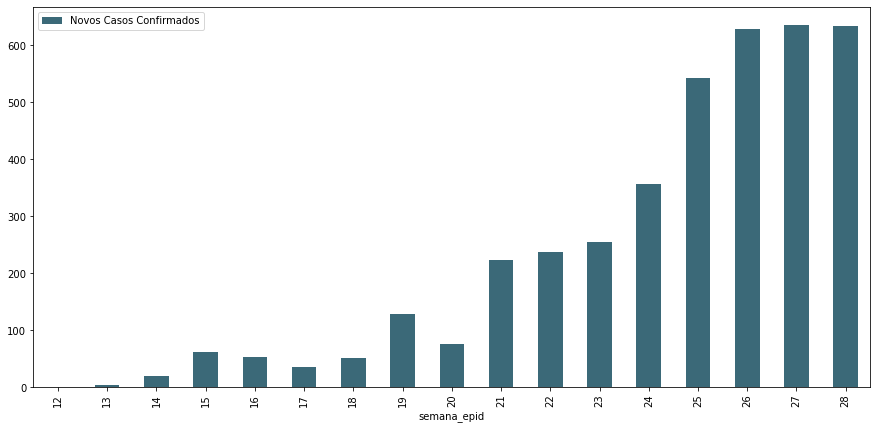

In [7]:
data.query("cidade == 'São José dos Campos'") \
    .groupby("semana_epid").sum() \
    .plot(kind = 'bar', 
          y = 'novos_confirmados', 
          label = 'Novos Casos Confirmados', 
          figsize = (15, 7), 
          color = '#3b6978')

## Quantidade de mortes confirmadas por semana epidemológica em SJC

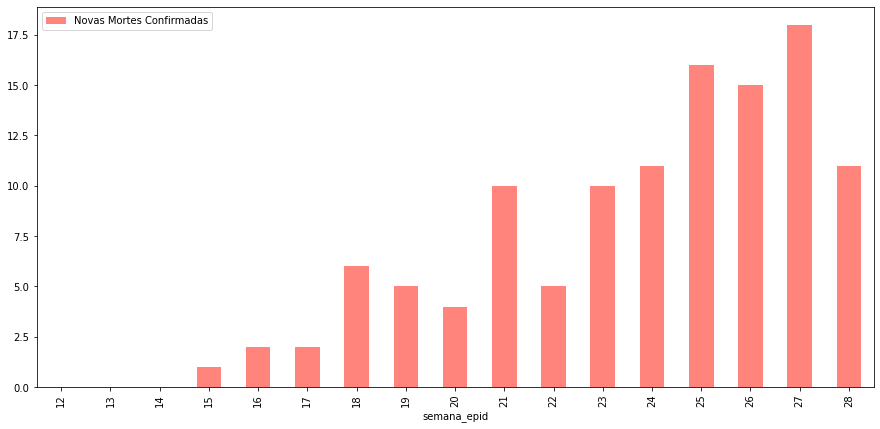

In [8]:
data.query("cidade  == 'São José dos Campos'") \
    .groupby("semana_epid").sum() \
    .plot(kind = 'bar', 
          y = 'novas_mortes', 
          label = 'Novas Mortes Confirmadas', 
          figsize = (15, 7), 
          color = '#ff847c')

In [9]:
temp = data.query("tipo_lugar == 'state'")
casos = temp.sum()['novos_confirmados']
media = temp.mean()['novos_confirmados']
print(f"SP possui {casos} casos confirmados até o momento com uma média de {int(media)} casos por dia!")

SP possui 366890 casos confirmados até o momento com uma média de 2658 casos por dia!


## Principais cidades do Vale: porcentagem de casos confirmados

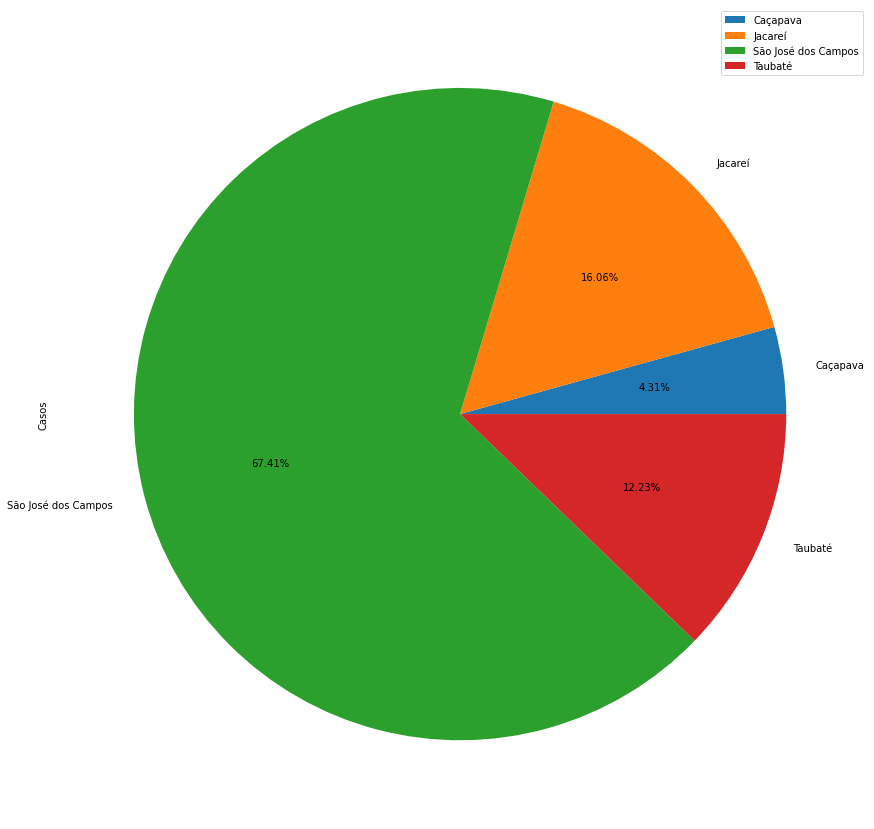

In [55]:
data.query("cidade in ('São José dos Campos', 'Taubaté', 'Jacareí', 'Caçapava')") \
    .groupby("cidade").sum() \
    .plot(kind='pie', 
          y='novos_confirmados', 
          label = 'Casos', 
          ax = plt.gca(), 
          figsize = (25, 15),
          autopct = lambda p: '{:.2f}%'.format(p))

## Principais cidades do Vale: porcentagem de mortes confirmadas

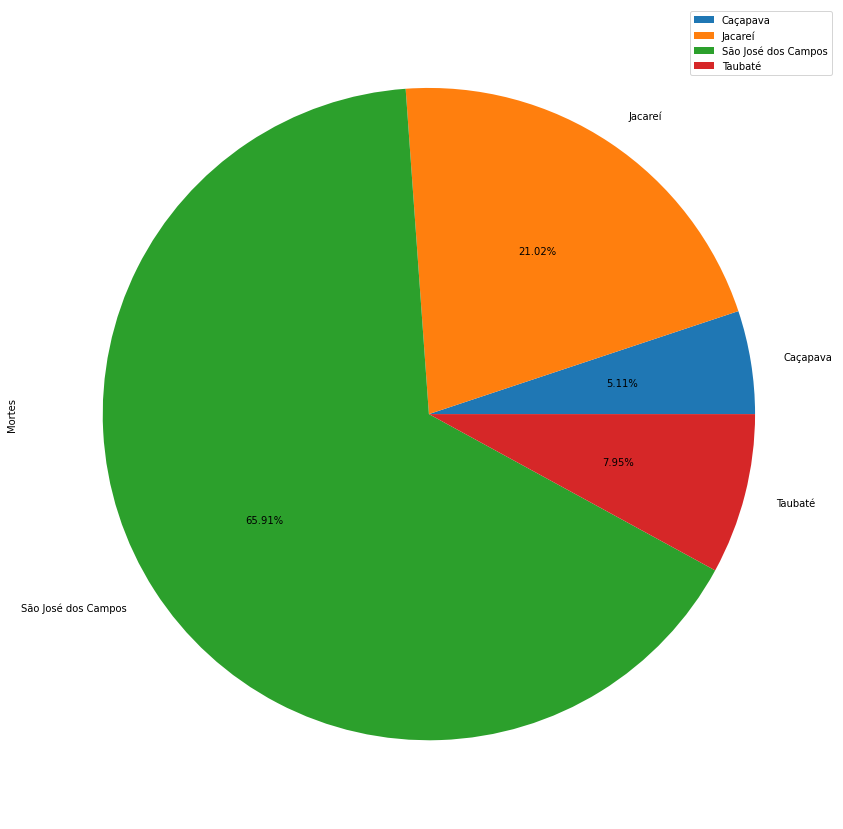

In [57]:
data.query("cidade in ('São José dos Campos', 'Taubaté', 'Jacareí', 'Caçapava')") \
    .groupby("cidade").sum() \
    .plot(kind='pie', 
          y='novas_mortes', 
          label = 'Mortes', 
          ax = plt.gca(), 
          figsize = (25, 15),
          autopct = lambda p: '{:.2f}%'.format(p))